## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nhanes_loader
import importlib
importlib.reload(nhanes_loader)
import numpy as np
from sklearn.linear_model import LinearRegression

## Import Household Adult File

In [2]:
from nhanes.household_adult_file import HouseholdAdultFile
nh = HouseholdAdultFile()

In [3]:
nh.cols

,description,variable,position,end position,length
0,Sequence number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
1233,BP statement read to SP (years 5 and 6),HAZA12,3336,NaN,1
1234,Average K1 BP from household and MEC,HAZMNK1R,3337,3339.0,3
1235,Number of BP's used for average K1,HAZNOK1R,3340,3341.0,2
1236,Average K5 BP from household and MEC,HAZMNK5R,3342,3344.0,3


## Import Exam File

In [6]:
import nhanes.exam_file
importlib.reload(nhanes.exam_file)
from nhanes.exam_file import ExamFile

In [7]:
exam = ExamFile()

In [8]:
exam.data.shape

(31311, 45)

In [9]:
exam.cols

,description,variable,position,end position,length
0,Respondent identification number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
2363,Time to complete 8-ft walk--trial B(sec),PFPTWLKB,6221,6224.0,4
2364,Number of steps--trial B,PFPNSTPB,6225,6226.0,2
2365,Pain reported on walking,PFPPAIN,6227,NaN,1
2366,Type of device used,PFPDEVIC,6228,NaN,1


## Import Household Youth File

In [10]:
import nhanes.household_youth_file
importlib.reload(nhanes.household_youth_file)
from nhanes.household_youth_file import HouseholdYouthFile

In [11]:
youth = HouseholdYouthFile()

In [12]:
youth.cols

,description,variable,position,end position,length
0,Sequence number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
682,ICD-9-CM code-9th,HYK11AO,2087,2092.0,6
683,For how long been taking (days)-9th,HYK12SO,2093,2097.0,5
684,Main respondents relationship to SP,HYM1,2098,2099.0,2
685,Was SP present during any of interview,HYM2,2100,NaN,1


## Combine adult and exam files - adult_exam

match files on the SEQN field 

In [13]:
adult_exam = nh.data.set_index('SEQN').join(exam.data.set_index('SEQN'),rsuffix='_exam')

In [14]:
adult_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20050 entries, 3 to 53623
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HAR1           20050 non-null  int64  
 1   HAR23          20050 non-null  int64  
 2   HAR26          20050 non-null  int64  
 3   HAC1E          20050 non-null  int64  
 4   HAC1F          20050 non-null  int64  
 5   HAC1G          20050 non-null  int64  
 6   HAC1O          20050 non-null  int64  
 7   HAL6           20050 non-null  int64  
 8   HAL10          20050 non-null  int64  
 9   HAL1           20050 non-null  int64  
 10  HAL3           20050 non-null  int64  
 11  HAL5           20050 non-null  int64  
 12  DMARACER       20050 non-null  int64  
 13  DMARETHN       20050 non-null  int64  
 14  DMAETHNR       20050 non-null  int64  
 15  HSSEX          20050 non-null  int64  
 16  HSAGEIR        20050 non-null  int64  
 17  HSAGEU         20050 non-null  int64  
 18  HXPAXT

## Combine youth and exam files - youth_exam

In [15]:
youth_exam = youth.data.set_index('SEQN').join(exam.data.set_index('SEQN'),rsuffix='_exam')

In [16]:
youth_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13944 entries, 7 to 53622
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HYE1G          13944 non-null  int64  
 1   HYE1H          13944 non-null  int64  
 2   HSSEX          13944 non-null  int64  
 3   HSAGEIR        13944 non-null  int64  
 4   HSAGEU         13944 non-null  int64  
 5   DMARACER       13944 non-null  int64  
 6   DMARETHN       13944 non-null  int64  
 7   DMAETHNR       13944 non-null  int64  
 8   HXPAXTMR       36 non-null     float64
 9   HXPSESSR       36 non-null     float64
 10  HYG2           2216 non-null   float64
 11  HYG4           2216 non-null   float64
 12  HYG7           3690 non-null   float64
 13  HYG8           13944 non-null  int64  
 14  HYG12          13944 non-null  int64  
 15  HSAITMOR       13944 non-null  int64  
 16  SPPQ1          4281 non-null   float64
 17  SPPQ2          4281 non-null   float64
 18  SPPQ3 

In [17]:
youth_exam.query('HSAGEIR < 18').shape

(13944, 60)

# Hankinson Exclusion

Ages - have none over 89; 17-89
20,050 patients in adult exam file (age > 0)

In [18]:
adult_exam.HSAGEIR.value_counts()

17    432
23    423
24    407
31    403
18    403
     ... 
85    138
86    128
87    110
88     70
89     56
Name: HSAGEIR, Length: 74, dtype: int64

Check for age of 16

In [19]:
adult_exam.query('HSAGEIR < 17').shape

(0, 66)

Any age  .shape - returns row and column count of a dataset

.describe() - returns statistics about numerical columns

.dtypes - returns the data type of each column

.count() - number of total values in column

.value_counts() - returns object counting counts of unique values

In [20]:
adult_exam.query('HSAGEIR>0').shape

(20050, 66)

Any spirometry  H 16484 

## SPPMANEU - # acceptable trials

According to the NHANES documentation, the values for SPPMANEU (number of acceptable trials)

00 150; 01-16 20836. 88 1445 blank 8880

so total spirometry is 150 + 20836 = 20986, but this doesn't match, looking at data base values which has 16840 with SPPMANEU 0 to <88

In [22]:
adult_exam.SPPMANEU.value_counts()

5.0     7569
6.0     2553
4.0     1932
7.0     1544
88.0    1310
8.0     1238
3.0      668
9.0      400
2.0      292
10.0     233
1.0      226
0.0      144
11.0      23
13.0       8
12.0       8
14.0       1
16.0       1
Name: SPPMANEU, dtype: int64

adult_exam.SPPMANEU.value_counts()

In [23]:
adult_exam.query('SPPMANEU != 88').shape

(18740, 66)

In [24]:
adult_exam.query('SPPMANEU > -1 & SPPMANEU < 88').shape

(16840, 66)

In [25]:
adult_exam.query('SPPMANEU > -1').shape

(18150, 66)

## total with spirometry 16840

>2 should = total spirometry - 1 test ( 18740 - 226 = 

In [26]:
adult_exam.query('SPPMANEU == 1').shape

(226, 66)

## number 2 or more acceptable trials  H 277, 16207  we have 16470 (+263)

In [27]:
adult_exam.query('2 <= SPPMANEU < 88').shape

(16470, 66)

In [28]:
adult_exam.query('SPPMANEU > 1 & SPPMANEU < 88').shape

(16470, 66)

## does it need be reproducible SPPREPRO = 4 both FVC and FEV1 reproducible; 1 FVC not repord; 2 FEV1 no reprod 3 neither FVC or FEV1 reproducible

In [29]:
adult_exam.SPPREPRO.value_counts()

4.0    15373
8.0     1454
1.0     1003
3.0      267
2.0       53
Name: SPPREPRO, dtype: int64

In [30]:
adult_exam.query('SPPMANEU > 1 & SPPMANEU < 88 & SPPREPRO == 4').shape

(15286, 66)

In [31]:
adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)').shape

(16289, 66)

## Number with spirometry 2 or more with both FEV1 reprod or FEV1 and FVC reproducible - 16289 vs Hankinson 16207

Hankinson says 20,627 performed spirometry and eliminated 13,198 leaving 7429 (4,103 youth 16,207 adult)

does the number of acceptable trials SPPMANEU need be more than 1 - say exclude if <2 acceptable curves

and age < 90 H 68,16139  we have 84  16386 (+26, +247)

In [32]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR >89').shape

(84, 66)

In [33]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').shape

(16386, 66)

In [34]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('HSAGEIR < 90').shape)

(16215, 66)

## and age <90 16386, 16215

# first number is with 2 or more spirometries and = the parameter; 2nd is 2 or more with reproducible FEV1 with not the parameter

adult_exam.query('HSAGEIR >= 90').shape

and race/ethnicity not other  H 636, 15503

adult_exam.query('HSAGEIR > 0').shape

and race/ethnicity not other  H 636  15503  we have 639, 15747 (+3, +244)

In [35]:
adult_exam.DMARETHN.value_counts()

1    8483
2    5486
3    5306
4     775
Name: DMARETHN, dtype: int64

In [36]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN == 4').shape

(639, 66)

In [37]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').shape)

(15747, 66)

In [38]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').shape)

(15580, 66)

# and race not other 15747, 15580

and cigarette smoker H 7,667  7,836  We have  7787 7960 (+120  +124)


In [39]:
adult_exam.HAR1.value_counts()

2    10235
1     9799
8       16
Name: HAR1, dtype: int64

or statement not work, so need HAR1 = 2

In [40]:
adult_exam.query('HAR1 == 1' or 'HAR1 == 8').shape

(9799, 66)

In [41]:
adult_exam.query('HAR1 == 1 | HAR1 == 8').shape

(9815, 66)

In [42]:
adult_exam.query('HAR1 == 2').shape

(10235, 66)

age<90 & ethnicity not other and not smoker(HAR1==2)

In [43]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 ==2').shape

(7960, 66)

# and not smoker('not HAR1==1') 7960, 7851

In [44]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1').shape

(7960, 66)

In [45]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1').shape)

(7851, 66)

HXPG1 how many cigarettes past 5 days. 0, #, or 888 applicable  SO '0 < HXPG1 < 888'

In [46]:
adult_exam.query('0 < HXPG1 < 888').shape

(65, 66)

include those not smoking cigarettes 5 days

In [47]:
adult_exam.query('not (0 < HXPG1 < 888)').shape

(19985, 66)

In [48]:
adult_exam.query('(HXPG1 ==0) | (HXPG1 == 888)').shape

(392, 66)

HXPG2A -pipes

In [49]:
adult_exam.query('0 < HXPG2A < 88').shape

(6, 66)

HXPG2B - cigars

In [50]:
adult_exam.query('0 < HXPG2B < 88').shape

(1, 66)

adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 ==2').shape

cigs, pipe, cigars

In [51]:
adult_exam.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape

(19979, 66)

In [52]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('MYPB11 ==1').shape

(0, 66)

and cigar or pipe smoker  H 313, 7523  for cigar we have 284, 7676 

cigar HAR23  2 is not cigar

In [53]:
adult_exam.HAR23.value_counts()

2    17951
1     2073
8       21
9        5
Name: HAR23, dtype: int64

In [54]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 ==2').query('HAR23 == 2').shape

(7676, 66)

and pipe smoker with above H 313 7523  We have 326 7634 (+13 +111)

In [55]:
adult_exam.HAR26.value_counts()

2    18411
1     1609
8       26
9        4
Name: HAR26, dtype: int64

In [56]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').shape

(7634, 66)

In [57]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2')
 .query('HAR23 == 2').query('not HAR26 == 1').shape)

(7638, 66)

In [201]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' ).shape)

(7531, 66)

# and not cigar or pipe smoker 7634, 7531

and smoked cigarettes/cigar/pipes in 5 d prior to exam  H 408 7115  

SPQ4 cough, cold or other acute illness;  SPQ3 smoked, ate in past hour

In [58]:
adult_exam.HAR1.value_counts()

2    10235
1     9799
8       16
Name: HAR1, dtype: int64

In [59]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').query('SPPQ3 == 2').query('SPPQ4 == 2').query('SPPQ5 == 2').shape

(5965, 66)

In [202]:
(adult_exam.query('2 <= SPPMANEU < 88')
 .query('HSAGEIR < 90').query('DMARETHN < 4')
 .query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').shape)

(7634, 66)

# add exclude if smoked in 5 days - only 2 more excluded 7632, 7529

In [61]:
adult_exam.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape

(19979, 66)

In [62]:
(adult_exam.query('2 <= SPPMANEU < 88')
 .query('HSAGEIR < 90').query('DMARETHN < 4')
 .query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape)

(7632, 66)

In [203]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape)

(7529, 66)

In [63]:
adult_exam.HAC1E.value_counts()

2    18672
1     1376
9        1
8        1
Name: HAC1E, dtype: int64

In [205]:
adult_exam.HAR26.value_counts()

2    18411
1     1609
8       26
9        4
Name: HAR26, dtype: int64

and asthma H  454  6661  query('HAC1E == 2') (which gives different that > 1

In [64]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('HAR26 == 2'). query('HAC1E == 2').shape)

(7158, 66)

# and asthma (7156 , 7060)

In [65]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2').shape)

(7156, 66)

In [206]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1').shape)

(7060, 66)

and chronic bronchitis H  181, 6480  HAC1F == 2

In [66]:
adult_exam.HAC1F.value_counts()

2    18914
1     1134
9        2
Name: HAC1F, dtype: int64

In [67]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').shape)

(6962, 66)

# and chronic bronchitis (6960, 6868 subjects remaining)

In [69]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').shape)

(6960, 66)

In [207]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
. query('not HAC1F == 1').shape)

(6868, 66)

and emphysema  H 15, 6465  HAC1G == 2


In [70]:
adult_exam.HAC1G.value_counts()

2    19614
1      430
9        5
8        1
Name: HAC1G, dtype: int64

In [71]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').shape

(6945, 66)

# and emphysema (6943, 6852 remaining)

In [72]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2')
 .query('HAC1G == 2').shape)

(6943, 66)

In [208]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
  .query('not HAC1G == 1').shape)

(6852, 66)

and cancer H 0 6465

## When add cancer excludes many, but Hankinson none (when lung cancer), so exclude this future analyses

In [73]:
adult_exam.HAC1O.value_counts()

2    19266
1      780
9        3
8        1
Name: HAC1O, dtype: int64

In [74]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAC1O == 2').shape

(6756, 66)

and wheezing 6 month  H 419 6046  HAL6

In [75]:
adult_exam.HAL6.value_counts()

2    17097
1     2942
8        8
9        3
Name: HAL6, dtype: int64

In [76]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').shape

(6495, 66)

and whistling or wheezing  H 112 5934  HAL10

In [77]:
adult_exam.HAL6.value_counts()

2    17097
1     2942
8        8
9        3
Name: HAL6, dtype: int64

# and wheezing 12 months 6493, 6408

In [78]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2')
 .query('HAC1G == 2')
 .query('HAL6 == 2').shape)

(6493, 66)

In [209]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1').shape)

(6408, 66)

# and wheezing 12 months not=1

In [79]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2')
 .query('HAC1G == 2')
 .query('not HAL6 == 1').shape)

(6494, 66)

In [80]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').shape

(6368, 66)

# and wheezing apart from colds 6366, 6285

In [81]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2')
 .query('HAC1G == 2')
 .query('HAL6 == 2')
 .query('HAL10 == 2').shape)

(6366, 66)

In [210]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .shape)

(6285, 66)

In [82]:
adult_exam.HAL10.value_counts()

2    17958
1     2072
8       14
9        6
Name: HAL10, dtype: int64

and persistent cough H 158, 5776  HAL1

# and not persistent cough 6200, 6121

In [83]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').query('HAL1 == 2').shape

(6200, 66)

In [212]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .shape)

(6121, 66)

In [84]:
adult_exam.HAL1.value_counts()

2    18461
1     1582
8        6
9        1
Name: HAL1, dtype: int64

# and not persistent phlegm H 125  5776  HAL 3, 6065,5990

In [85]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').query('HAL1 == 2').query('HAL3 == 2').shape

(6065, 66)

In [213]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .shape)

(5990, 66)

# and moderate shortness of breath H  848  4803  HAL5  5151 5116

In [86]:
adult_exam.HAL3.value_counts()

2    18330
1     1705
8       12
9        3
Name: HAL3, dtype: int64

In [87]:
adult_exam.HAL5.value_counts()

2    14910
1     5030
8       64
9       46
Name: HAL5, dtype: int64

In [214]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .shape)

(5116, 66)

In [88]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').query('HAL1 == 2').query('HAL3 == 2').query('HAL5 == 2').shape

(5151, 66)

In [90]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1').query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1').query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1').query('HAL3 > 1').query('HAL5 == 2').shape

(5122, 66)

# and age < 81  H  139 4634  HSAGEIR 4944, 4925


adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1').query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1').query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1').query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81').shape

In [91]:
(adult_exam.query('2 <= SPPMANEU < 88')
.query('HSAGEIR < 90').query('DMARETHN < 4')
.query('HAR1 == 2').query('HAR23 > 1')
.query('HAR26 > 1').query('HAC1E > 1')
.query('HAC1F > 1').query('HAC1G > 1')
.query('HAC1O > 1').query('HAL6 > 1')
.query('HAL1 > 1').query('HAL3 > 1')
.query('HAL5 == 2').query('HSAGEIR < 81').shape)

(4944, 66)

In [215]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .query('HSAGEIR < 81')
 .shape)

(4925, 66)

## Now create DataFrame adult_final of the final rows selected

set AdultFinal = adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1').query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1').query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1').query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81').shape

adult_final = (adult_exam.query('2 <= SPPMANEU < 88')
                         .query('HSAGEIR < 90').query('DMARETHN < 4')
                           .query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1')
                           .query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1')
                           .query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1')
                           .query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81'))

Not use this adult_final = (adult_exam.query('2 <= SPPMANEU < 88')
                         .query('HSAGEIR < 90').query('DMARETHN < 4')
                           .query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1')
                           .query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1')
                           .query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1')
                           .query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81'))

In [216]:
adult_final = (adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .query('HSAGEIR < 81'))

In [217]:
af = adult_final

In [ ]:
af.info()

In [ ]:
nh.cols[nh.cols.description.str.contains('age')]

In [220]:
af.SPPFEV1

SEQN
3        4640.0
4        3089.0
45       1840.0
52       4658.0
60       3651.0
          ...  
53558    2626.0
53567    3348.0
53592    3642.0
53593    5214.0
53623    3196.0
Name: SPPFEV1, Length: 4925, dtype: float64

## Now do youth exclusion

In [221]:
youth_exam.shape

(13944, 60)

age 8-17

In [224]:
youth_exam.query('7 < HSAGEIR < 17').shape

(5365, 60)

In [223]:
youth_exam.query('HSAGEIR > 0').shape

(13944, 60)

Youth ethnicity

In [99]:
youth_exam.DMARETHN.value_counts()

1    4602
3    4445
2    4141
4     756
Name: DMARETHN, dtype: int64

spirometry unusable <2 curves

In [226]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.shape)

(4076, 60)

In [225]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').shape

(4114, 60)

ethnicity other

In [101]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').shape

(3928, 60)

In [228]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.shape)

(3890, 60)

try B1 ever smoker  not work exclude too many

In [102]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB1 == 1').shape

(3238, 60)

smoker B1 and B3 ** B1 too many; B3 (>5 pks) OK

# now try using MYPB11 - smoked >100 cigarettes in life

# MYPB3 youth smoked at least 100 cigarettes

In [103]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').shape

(3813, 60)

In [229]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.shape)

(3775, 60)

smoked 5 days B11 and B27

In [104]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').shape

(3594, 60)

and B27

In [105]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').shape

(3593, 60)

In [230]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.shape)

(3555, 60)

asthma E1g

In [106]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').shape

(3268, 60)

In [231]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.shape)

(3232, 60)

chronic bronchitis E1h

In [107]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').shape

(3180, 60)

In [232]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.shape)

(3145, 60)

wheezing 12 months

In [108]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').shape

(2899, 60)

In [233]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.shape)

(2867, 60)

wheezing apart from colds

In [109]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').shape

(2848, 60)

In [234]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.shape)

(2816, 60)

Youth 12 years and older with above H 1298

In [110]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('HSAGEIR > 11').shape

(1305, 60)

In [235]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('HSAGEIR > 11')
.shape)

(1294, 60)

and not persistent cough G2 H 2816 **I all age

In [236]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').shape

(2832, 60)

In [237]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.shape)

(2800, 60)

and not persistent phlegm G4 H 2806

In [112]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').shape

(2822, 60)

In [238]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.shape)

(2790, 60)

and Youth age 8-under 12

In [113]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').query('HSAGEIR < 12').shape

(1543, 60)

In [239]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('HSAGEIR < 12')
.shape)

(1522, 60)

and not persistent cough G6 and G7

In [241]:
youth_exam.HYG7.value_counts()

1.0      1071
2.0       959
3.0       588
4.0       333
555.0     294
6.0       117
5.0       115
12.0       48
10.0       29
8.0        26
7.0        24
999.0      18
20.0       18
888.0      16
24.0       12
15.0        8
9.0         4
30.0        2
120.0       1
104.0       1
60.0        1
13.0        1
11.0        1
25.0        1
35.0        1
14.0        1
Name: HYG7, dtype: int64

In [114]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').query('not HYG7 == 555').shape

(2812, 60)

In [243]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('not HYG7 == 555')
.shape)

(2780, 60)

## Create youth_final

youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').query('not HYG7 == 555').shape

youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').query('not HYG7 == 555').shape

youth_final = (youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88')
               .query('DMARETHN < 4').query('not MYPB3 == 1')
               .query('not MYPB11 >0').query('not MYPB27A >0')
               .query('not HYE1G == 1').query('not HYE1H == 1')
               .query('not HYG8 == 1').query('not HYG12 == 1')
               .query('not HYG2 == 1').query('not HYG4 == 1')
               .query('not HYG7 == 555'))

not use anymore youth_final = (youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88')
               .query('DMARETHN < 4').query('not MYPB3 == 1')
               .query('not MYPB11 >0').query('not MYPB27A >0')
               .query('not HYE1G == 1').query('not HYE1H == 1')
               .query('not HYG8 == 1').query('not HYG12 == 1')
               .query('not HYG2 == 1').query('not HYG4 == 1')
               .query('not HYG7 == 555'))

In [246]:
youth_final = (youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('not HYG7 == 555'))

In [247]:
youth_final.shape

(2780, 60)

In [248]:
youth_final.head(2)

,HYE1G,HYE1H,HSSEX,HSAGEIR,HSAGEU,DMARACER,DMARETHN,DMAETHNR,HXPAXTMR,HXPSESSR,...,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B
SEQN,,,,,,,,,,,,,,,,,,,,,
14,2,2,2,16,2,1,1,3,NaN,NaN,...,166.9,87.0,47.50,1,1.0,3.0,196.0,NaN,NaN,NaN
16,2,2,1,16,2,1,3,1,NaN,NaN,...,167.6,89.2,62.65,1,3.0,1.0,198.0,NaN,NaN,NaN


After all of the exclusions, the youth_final dataframe has 2812 entries.

In [249]:
youth.cols

,description,variable,position,end position,length
0,Sequence number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
682,ICD-9-CM code-9th,HYK11AO,2087,2092.0,6
683,For how long been taking (days)-9th,HYK12SO,2093,2097.0,5
684,Main respondents relationship to SP,HYM1,2098,2099.0,2
685,Was SP present during any of interview,HYM2,2100,NaN,1


## Reviewing adult file

In [250]:
cols = nh.cols
cols

,description,variable,position,end position,length
0,Sequence number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
1233,BP statement read to SP (years 5 and 6),HAZA12,3336,NaN,1
1234,Average K1 BP from household and MEC,HAZMNK1R,3337,3339.0,3
1235,Number of BP's used for average K1,HAZNOK1R,3340,3341.0,2
1236,Average K5 BP from household and MEC,HAZMNK5R,3342,3344.0,3


In [251]:
cols[cols.description.str.contains('(?:smok|cig)')]

,description,variable,position,end position,length
259,Anyone living here smoke cigs in home,HFF1,1356,NaN,1
260,# persons who smoke cigarettes in home,HFF2R,1357,1358.0,2
261,Cigarettes per day person 1 smokes,HFF3A,1359,1361.0,3
262,Cigarettes per day person 2 smokes,HFF3B,1362,1364.0,3
263,Cigarettes per day person 3 smokes,HFF3C,1365,1367.0,3
264,Cigarettes per day person 4 smokes,HFF3D,1368,1370.0,3
265,Cigarettes per day person 5 smokes,HFF3E,1371,1373.0,3
266,Cigarettes per day person 6 smokes,HFF3F,1374,1376.0,3
419,Doctor told stop smoking for HBP,HAE4D3,1606,NaN,1
428,Now quit smoking for high blood pressure,HAE5D3,1615,NaN,1


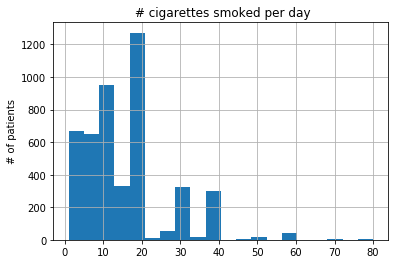

In [252]:
nh.hist_amount('HAR4S');

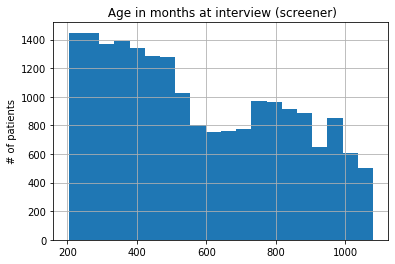

In [253]:
nh.hist_amount('HSAITMOR',outliers=1200);

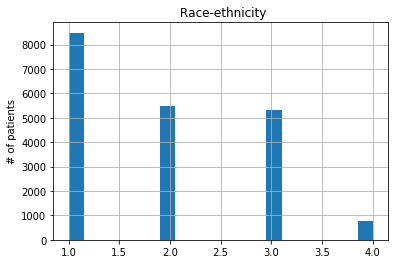

In [254]:
nh.hist_amount('DMARETHN', outliers=25);

In [255]:
cols[cols.description.str.contains('weight|pounds') & ~cols.description.str.contains('(sample|interview|weighting|exam)')]

/usr/local/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,description,variable,position,end position,length
210,Mother's weight calculated in pounds,HFC2S,1300,NaN,1
212,Father's weight calculated in pounds,HFC4S,1302,NaN,1
414,Doctor told control/lose weight for HBP,HAE4B,1601,NaN,1
424,Now controlling or losing weight for HBP,HAE5B,1611,NaN,1
435,Doctor told lose weight for HBC,HAE8B,1622,NaN,1
439,Now losing weight to lower cholesterol,HAE9B,1626,NaN,1
444,"On own for HBC, controlled/lost weight",HAE11B,1631,NaN,1
599,Difficulty lifting or carrying 10 pounds,HAH4,1807,NaN,1
705,Consider self over/under/right weight,HAM11,1964,NaN,1
707,Tried to lose weight in past 12 months,HAM13,1966,NaN,1


In [256]:
cols[cols.description.str.contains('height|cm') & ~cols.description.str.contains('(sample|interview|weighting|exam)')]

/usr/local/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,description,variable,position,end position,length
211,Mother's height calculated in inches,HFC3S,1301,NaN,1
213,Father's height calculated in inches,HFC5S,1303,NaN,1


In [257]:
cols[cols.description.str.contains('stand') ]

,description,variable,position,end position,length
450,If stand still is chest pain relieved,HAF5,1637,NaN,1
466,Leg pain begin while stand still/sitting,HAF15,1658,NaN,1
472,Is leg pain relieved if you stand still,HAF21,1664,NaN,1
478,Problem with ability to speak/understand,HAF27,1670,NaN,1
604,Difficulty standing from armless chair,HAH9,1812,NaN,1


Test Markdown

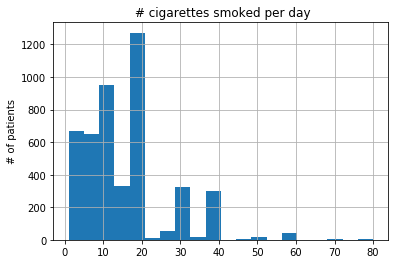

In [258]:
nh.hist_amount('HAR4S');

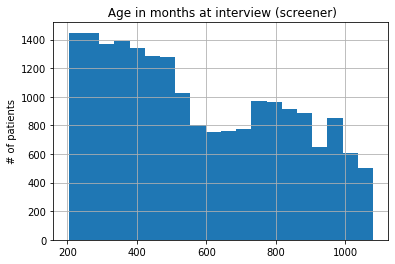

In [259]:
nh.hist_amount('HSAITMOR',outliers=1200);

## Now analyze adult_final

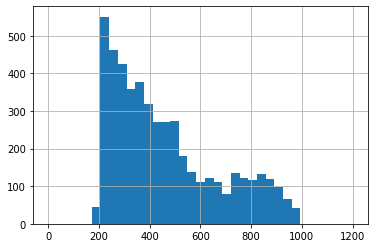

In [260]:
adult_final.HSAITMOR.hist(bins='auto', range=(0,1200))

## Create new fields in adult_final and youth_final

Create new fields (XoY = X/Y) in youth_final and adult_final

In [261]:
oldvariables = [ 'SPPFEV1', 'SPPFEV3', 'SPPFEV6', 'SPPFVC','SPPPEAK','SPPMMEF', 'SPPFEF75', 'SPPEXPIR']

## Create new variables in adult_final final and youth_final

newvariables = ['FEV1OFVC', 'FEV1OFEV6', 'PEFROFVC', 'PEFROFEV6', 'PEFROFEV1', 'FEV3OFVC', 'FEV6OFVC']

def createvariables(df):
    df['FEV1OFVC'] = df.SPPFEV1 / df.SPPFVC
    df['FEV1OFEV6']= df.SPPFEV1 / df.SPPFEV6
    df['PEFROFVC'] = df.SPPPEAK / df.SPPFVC
    df['PEFROFEV6']= df.SPPPEAK / df.SPPFEV6
    df['PEFROFEV1'] = df.SPPPEAK / df.SPPFEV1
    df['FEV3OFVC'] = df.SPPFEV3 / df.SPPFVC
    df['FEV6OFVC'] = df.SPPFEV6 / df.SPPFVC
    return

In [262]:
def createvariables(df):
    df['FEV1OFVC'] = df.SPPFEV1 / df.SPPFVC
    df['FEV1OFEV6']= df.SPPFEV1 / df.SPPFEV6
    df['PEFROFVC'] = df.SPPPEAK / df.SPPFVC
    df['PEFROFEV6']= df.SPPPEAK / df.SPPFEV6
    df['PEFROFEV1'] = df.SPPPEAK / df.SPPFEV1
    df['FEV3OFVC'] = df.SPPFEV3 / df.SPPFVC
    df['FEV6OFVC'] = df.SPPFEV6 / df.SPPFVC
    return
    

createvariables(adult_final) then youth_final

In [263]:
createvariables(adult_final)

In [264]:
createvariables(youth_final)

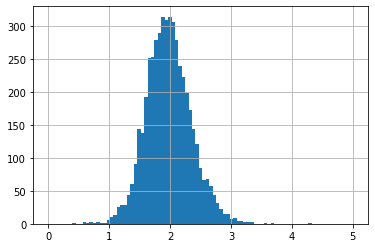

In [265]:
adult_final.PEFROFVC.hist(bins='auto', range=(0,5))

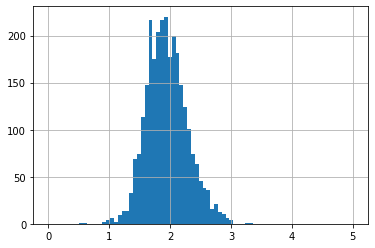

In [266]:
youth_final.PEFROFVC.hist(bins='auto', range=(0,5))

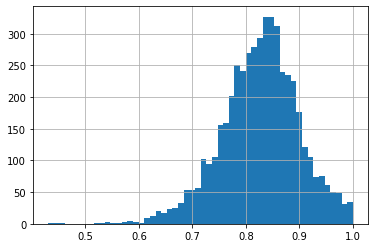

In [267]:
adult_final.FEV1OFVC.hist(bins='auto')

In [268]:
adult_final.describe()

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC
count,4925.0,4925.0,4925.000000,4925.0,4925.0,4925.000000,4925.000000,4925.000000,4925.000000,4925.0,...,22.0,22.0,22.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000
mean,2.0,2.0,2.003655,2.0,2.0,2.001218,1.983350,2.001421,2.002437,2.0,...,0.0,0.0,76.000000,0.826157,0.837251,1.977110,2.005007,2.393712,1.107948,1.140618
std,0.0,0.0,0.148054,0.0,0.0,0.085496,0.166579,0.099746,0.120898,0.0,...,0.0,0.0,30.910008,0.072924,0.082372,0.369588,0.390939,0.401715,2.506510,2.504164
min,2.0,2.0,2.000000,2.0,2.0,2.000000,1.000000,2.000000,2.000000,2.0,...,0.0,0.0,0.000000,0.430769,0.014389,0.437173,0.026089,0.989630,0.689231,0.794219
25%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.0,...,0.0,0.0,88.000000,0.782431,0.802104,1.729972,1.760333,2.125053,0.924968,0.972951
50%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.0,...,0.0,0.0,88.000000,0.830703,0.842105,1.961848,1.996001,2.373698,0.957725,0.991572
75%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.0,...,0.0,0.0,88.000000,0.873748,0.879573,2.208861,2.246493,2.646116,0.984545,0.999446
max,2.0,2.0,8.000000,2.0,2.0,8.000000,9.000000,9.000000,8.000000,2.0,...,0.0,0.0,88.000000,1.000000,1.000422,4.283804,3.588963,4.287374,66.682671,66.682671


In [269]:
adult_final.BMPHT.std()

9.731032035139023

In [270]:
adult_final.describe()

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC
count,4925.0,4925.0,4925.000000,4925.0,4925.0,4925.000000,4925.000000,4925.000000,4925.000000,4925.0,...,22.0,22.0,22.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000
mean,2.0,2.0,2.003655,2.0,2.0,2.001218,1.983350,2.001421,2.002437,2.0,...,0.0,0.0,76.000000,0.826157,0.837251,1.977110,2.005007,2.393712,1.107948,1.140618
std,0.0,0.0,0.148054,0.0,0.0,0.085496,0.166579,0.099746,0.120898,0.0,...,0.0,0.0,30.910008,0.072924,0.082372,0.369588,0.390939,0.401715,2.506510,2.504164
min,2.0,2.0,2.000000,2.0,2.0,2.000000,1.000000,2.000000,2.000000,2.0,...,0.0,0.0,0.000000,0.430769,0.014389,0.437173,0.026089,0.989630,0.689231,0.794219
25%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.0,...,0.0,0.0,88.000000,0.782431,0.802104,1.729972,1.760333,2.125053,0.924968,0.972951
50%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.0,...,0.0,0.0,88.000000,0.830703,0.842105,1.961848,1.996001,2.373698,0.957725,0.991572
75%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.0,...,0.0,0.0,88.000000,0.873748,0.879573,2.208861,2.246493,2.646116,0.984545,0.999446
max,2.0,2.0,8.000000,2.0,2.0,8.000000,9.000000,9.000000,8.000000,2.0,...,0.0,0.0,88.000000,1.000000,1.000422,4.283804,3.588963,4.287374,66.682671,66.682671


In [271]:
print (adult_final.columns.values)

['HAR1' 'HAR23' 'HAR26' 'HAC1E' 'HAC1F' 'HAC1G' 'HAC1O' 'HAL6' 'HAL10'
 'HAL1' 'HAL3' 'HAL5' 'DMARACER' 'DMARETHN' 'DMAETHNR' 'HSSEX' 'HSAGEIR'
 'HSAGEU' 'HXPAXTMR' 'HXPSESSR' 'HSAITMOR' 'HAR4S' 'SPPQ1' 'SPPQ2' 'SPPQ3'
 'SPPQ4' 'SPPQ5' 'SPPMANEU' 'MYPB1' 'MYPB3' 'MYPB11' 'MYPB27A' 'MYPB27B'
 'HSAGEIR_exam' 'HSAGEU_exam' 'HXPAXTMR_exam' 'HXPSESSR_exam' 'HXPEJ6A2'
 'SPPTECH1' 'SPPTRIAL' 'SPPPEAK' 'SPPFEV05' 'SPPFEV1' 'SPPFEV3' 'SPPFEV6'
 'SPPFVC' 'SPPMMEF' 'SPPFEF75' 'SPPTYPE' 'SPPREPRO' 'SPPTIME' 'SPPEXPIR'
 'SPPTEMP' 'HSSEX_exam' 'WTPFHX6' 'MXPAXTMR' 'BMPHT' 'BMPSITHT' 'BMPWT'
 'DMARACER_exam' 'DMARETHN_exam' 'DMAETHNR_exam' 'HSAITMOR_exam' 'HXPG1'
 'HXPG2A' 'HXPG2B' 'FEV1OFVC' 'FEV1OFEV6' 'PEFROFVC' 'PEFROFEV6'
 'PEFROFEV1' 'FEV3OFVC' 'FEV6OFVC']


In [272]:
print (youth_final.columns.values)

['HYE1G' 'HYE1H' 'HSSEX' 'HSAGEIR' 'HSAGEU' 'DMARACER' 'DMARETHN'
 'DMAETHNR' 'HXPAXTMR' 'HXPSESSR' 'HYG2' 'HYG4' 'HYG7' 'HYG8' 'HYG12'
 'HSAITMOR' 'SPPQ1' 'SPPQ2' 'SPPQ3' 'SPPQ4' 'SPPQ5' 'SPPMANEU' 'MYPB1'
 'MYPB3' 'MYPB11' 'MYPB27A' 'MYPB27B' 'HSAGEIR_exam' 'HSAGEU_exam'
 'HXPAXTMR_exam' 'HXPSESSR_exam' 'HXPEJ6A2' 'SPPTECH1' 'SPPTRIAL'
 'SPPPEAK' 'SPPFEV05' 'SPPFEV1' 'SPPFEV3' 'SPPFEV6' 'SPPFVC' 'SPPMMEF'
 'SPPFEF75' 'SPPTYPE' 'SPPREPRO' 'SPPTIME' 'SPPEXPIR' 'SPPTEMP'
 'HSSEX_exam' 'WTPFHX6' 'MXPAXTMR' 'BMPHT' 'BMPSITHT' 'BMPWT'
 'DMARACER_exam' 'DMARETHN_exam' 'DMAETHNR_exam' 'HSAITMOR_exam' 'HXPG1'
 'HXPG2A' 'HXPG2B' 'FEV1OFVC' 'FEV1OFEV6' 'PEFROFVC' 'PEFROFEV6'
 'PEFROFEV1' 'FEV3OFVC' 'FEV6OFVC']


In [273]:
youth_final.describe()

,HYE1G,HYE1H,HSSEX,HSAGEIR,HSAGEU,DMARACER,DMARETHN,DMAETHNR,HXPAXTMR,HXPSESSR,...,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC
count,2780.0,2780.0,2780.000000,2780.000000,2780.0,2780.000000,2780.000000,2780.000000,0.0,0.0,...,0.0,0.0,0.0,2780.000000,2780.000000,2780.000000,2780.000000,2780.000000,2780.000000,2780.000000
mean,2.0,2.0,1.520144,11.548921,2.0,1.423022,2.097482,2.274820,NaN,NaN,...,NaN,NaN,NaN,0.879639,0.882194,1.946137,1.951788,2.207626,0.983934,0.996959
std,0.0,0.0,0.499684,2.485246,0.0,0.540723,0.786395,0.961669,NaN,NaN,...,NaN,NaN,NaN,0.059748,0.058176,0.335503,0.335074,0.318381,0.019405,0.007506
min,2.0,2.0,1.000000,8.000000,2.0,1.000000,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,0.316216,0.413063,0.516216,0.583065,1.172145,0.581757,0.765541
25%,2.0,2.0,1.000000,9.000000,2.0,1.000000,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,0.843086,0.846568,1.705831,1.712801,1.988659,0.975538,0.997777
50%,2.0,2.0,2.000000,11.000000,2.0,1.000000,2.000000,3.000000,NaN,NaN,...,NaN,NaN,NaN,0.883113,0.884615,1.925133,1.929309,2.194626,0.988779,0.999314
75%,2.0,2.0,2.000000,14.000000,2.0,2.000000,3.000000,3.000000,NaN,NaN,...,NaN,NaN,NaN,0.920203,0.921689,2.153150,2.161449,2.409219,0.999076,0.999576
max,2.0,2.0,2.000000,16.000000,2.0,3.000000,3.000000,3.000000,NaN,NaN,...,NaN,NaN,NaN,1.000000,1.001080,3.312586,3.314879,3.652091,1.000000,1.000000


# Created other data bases to analyze

# adult m20overb m20overcma f18overb f18overcma

male 20 over. female 18 over; and cma (Caucasian-Mexican American) or b (black)
NOT NEED m20over = adult_final.query('HSAGEIR >=20 & HSSEX == 1’)
NOT NEED f18over = adult_final.query('HSAGEIR >=18 & HSSEX == 2’)
m20overb  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 2'))
m20overcma  = adult_final.query(('HSAGEIR >=20 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overcma = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overb = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 2 '))
m20overc  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 1'))
m20overma  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 3'))
f18overc = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 1 '))
f18overma = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 3 '))

DMARETHN – 1 non-Hispanic white, 2 non-hispanic black, 3 Mexican American, 4 other


In [274]:
m20overb  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 2'))
m20overcma  = adult_final.query(('HSAGEIR >=20 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overcma = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overb = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 2 '))
m20overc  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 1'))
m20overma  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 3'))
f18overc = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 1 '))
f18overma = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 3 '))

In [275]:
f18overb.describe()

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFVC,FEV6OFVC
count,939.0,939.0,939.000000,939.0,939.0,939.0,939.000000,939.0,939.000000,939.0,...,3.0,3.0,3.0,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000
mean,2.0,2.0,2.006390,2.0,2.0,2.0,1.978701,2.0,2.006390,2.0,...,0.0,0.0,88.0,0.839725,0.849921,2.125443,2.152457,2.530754,1.110150,1.141231
std,0.0,0.0,0.195803,0.0,0.0,0.0,0.144457,0.0,0.195803,0.0,...,0.0,0.0,0.0,0.071704,0.077364,0.395039,0.412343,0.422704,2.862682,2.860745
min,2.0,2.0,2.000000,2.0,2.0,2.0,1.000000,2.0,2.000000,2.0,...,0.0,0.0,88.0,0.539349,0.014996,0.814485,0.041007,1.252341,0.763021,0.831153
25%,2.0,2.0,2.000000,2.0,2.0,2.0,2.000000,2.0,2.000000,2.0,...,0.0,0.0,88.0,0.796169,0.815995,1.879737,1.907199,2.247369,0.929135,0.975539
50%,2.0,2.0,2.000000,2.0,2.0,2.0,2.000000,2.0,2.000000,2.0,...,0.0,0.0,88.0,0.843328,0.853991,2.122661,2.150304,2.510473,0.960784,0.994429
75%,2.0,2.0,2.000000,2.0,2.0,2.0,2.000000,2.0,2.000000,2.0,...,0.0,0.0,88.0,0.887516,0.891418,2.357952,2.392393,2.793436,0.988309,0.999416
max,2.0,2.0,8.000000,2.0,2.0,2.0,2.000000,2.0,8.000000,2.0,...,0.0,0.0,88.0,1.000000,1.000000,3.583281,3.588963,4.029915,66.682671,66.682671


## Make dataframes mlt20 and flt18 for b, c, ma and cma combining adult final and youth final

male<20,female<18
mlt20b = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 2'))])
mlt20cma = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3)'))])
flt18b = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 2'))])
flt18cma = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3)'))])
mlt20c = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 1'))])
mlt20ma = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 3'))])
flt18c = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 1'))])
flt18ma = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 3'))])

DMARETHN – 1 non-Hispanic white, 2 non-hispanic black, 3 Mexican American, 4 other

In [276]:
mlt20b = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 2'))])
mlt20cma = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3)'))])
flt18b = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 2'))])
flt18cma = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3)'))])
mlt20c = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 1'))])
mlt20ma = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 3'))])
flt18c = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 1'))])
flt18ma = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 3'))])

# Create data bases for all male/female cma, black for ratios

Groups for ratios
All male cma  mallcma = pd.concat([m20overcma, mlt20cma])
All male black  mallb = pd.concat([m20overb, mlt20b])
All female cma  fallcma = pd.concat([f18overcma, flt18cma])
All female black  fallb = pd.concat([f18overb, flt18b])
All male c  mallc = pd.concat([m20overc, mlt20c])
All male ma  mallma = pd.concat([m20overma, mlt20ma])
All female c  fallc = pd.concat([f18overc, flt18c])
All female ma  fallma = pd.concat([f18overma, flt18ma])

In [277]:
mallcma = pd.concat([m20overcma, mlt20cma])
mallb = pd.concat([m20overb, mlt20b])
fallcma = pd.concat([f18overcma, flt18cma])
fallb = pd.concat([f18overb, flt18b])
mallc = pd.concat([m20overc, mlt20c])
mallma = pd.concat([m20overma, mlt20ma])
fallc = pd.concat([f18overc, flt18c])
fallma = pd.concat([f18overma, flt18ma])

## Check variable created

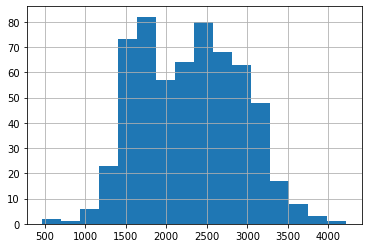

In [278]:
flt18b.SPPFEV1.hist(bins='auto')

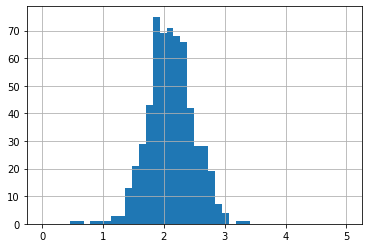

In [279]:
flt18b.PEFROFVC.hist(bins='auto', range=(0,5))

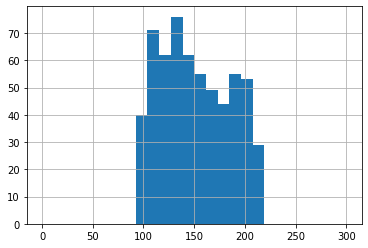

In [280]:
flt18b.HSAITMOR.hist(bins='auto', range=(0,300))

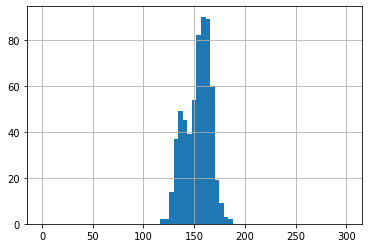

In [281]:
flt18b.BMPHT.hist(bins='auto', range=(0,300))

## Frames to Analyze

framestoanalyze = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, 
                   mlt20b, mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma, 
                   mallcma, mallb, mallc, mallma, fallcma, fallb, fallc, fallma]

In [282]:
framestoanalyze = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, 
                   mlt20b, mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma, 
                   mallcma, mallb, mallc, mallma, fallcma, fallb, fallc, fallma]

HAD BEEN. framestoanalyze = [m20overb, m20overcma, f18overb, f18overcma, mlt20b, mlt20cma, flt18b, flt18cma, mallcma, mallb, fallcma, fallb]


# framesto analyze names

m20overb.name = 'm20overb'
m20overcma.name = 'm20overcma'
f18overb.name = 'f18overb'
f18overcma.name = 'f18overcma'
mlt20b.name = 'mlt20b'
mlt20cma.name = 'mlt20cma'
flt18b.name = 'flt18b'
flt18cma.name = 'flt18cma'
mallcma.name = 'mallcma'
mallb.name = 'mallb'
fallcma.name = 'fallcma'
fallb.name = 'fallb'
m20overc.name = 'm20overc'
m20overma.name = 'm20ovecma'
f18overc.name = 'f18overc'
f18overma.name = 'f18overma'
mlt20c.name = 'mlt20c'
mlt20ma.name = 'mlt20ma'
flt18c.name = 'flt18c'
flt18ma.name = 'flt18ma'
mallma.name = 'mallma'
mallc.name = 'mallc'
fallma.name = 'fallma'
fallc.name = 'fallc'

In [283]:
m20overb.name = 'm20overb'
m20overcma.name = 'm20overcma'
f18overb.name = 'f18overb'
f18overcma.name = 'f18overcma'
mlt20b.name = 'mlt20b'
mlt20cma.name = 'mlt20cma'
flt18b.name = 'flt18b'
flt18cma.name = 'flt18cma'
mallcma.name = 'mallcma'
mallb.name = 'mallb'
fallcma.name = 'fallcma'
fallb.name = 'fallb'
m20overc.name = 'm20overc'
m20overma.name = 'm20ovecma'
f18overc.name = 'f18overc'
f18overma.name = 'f18overma'
mlt20c.name = 'mlt20c'
mlt20ma.name = 'mlt20ma'
flt18c.name = 'flt18c'
flt18ma.name = 'flt18ma'
mallma.name = 'mallma'
mallc.name = 'mallc'
fallma.name = 'fallma'
fallc.name = 'fallc'

## Variables non-ratio

varsnonratio = [ 'SPPFEV1', 'SPPFEV3', 'SPPFEV6', 'SPPFVC','SPPPEAK','SPPMMEF', 'SPPFEF75', 'SPPEXPIR']

In [284]:
varsnonratio = [ 'SPPFEV1', 'SPPFEV3', 'SPPFEV6', 'SPPFVC','SPPPEAK','SPPMMEF', 'SPPFEF75', 'SPPEXPIR']

In [285]:
print (varsnonratio[0])

SPPFEV1


## Variables ratio

varsratio = ['FEV1OFVC', 'FEV1OFEV6', 'PEFROFVC', 'PEFROFEV6', 'PEFROFEV1', 'FEV3OFVC', 'FEV6OFVC']

In [286]:
varsratio= ['FEV1OFVC', 'FEV1OFEV6', 'PEFROFVC', 'PEFROFEV6', 'PEFROFEV1', 'FEV3OFVC', 'FEV6OFVC']

## Now fit curves

using example in lmfit.github.io/lmfit-py/model.html

import matplotlib.pyplot as plt

In [287]:
import matplotlib.pyplot as plt

## from sklearn.linear_model import LinearRegression

In [288]:
from sklearn.linear_model import LinearRegression

# Linear Regression Age  linear_regage (data, y_var)

  #  height = 'BMPHT'
# age = 'HSAGEIR'/12 - or age in months/12
def linear_regage(data, y_var):
    X = data['HSAITMOR']/12  # to convert to year
    X = np.array(X).reshape(-1, 1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
    print(data.name, ", ",y_var, ", ",lr.intercept_, ", ", lr.coef_, ", ", lr.score(X, y), ", ", data.loc[:,y_var].std(), ", ", data.loc[:,y_var].count())
    return lr.intercept_, lr.coef_
    #. prints intercept, slope, and r squared
   # print (lr.std_)
   # return lr

# reg.coef_

# age = 'HSAGEIR'/12 - or age in months/12
def linear_regage(data, y_var):
    X = data['HSAITMOR_exam']/12  # to convert to year do months at exam
    X = np.array(X).reshape(-1, 1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
 #   print(data.name, ", ",y_var, ", ",lr.intercept_, ", ", lr.coef_, ", ", lr.score(X, y), ", ", data.loc[:,y_var].std(), ", ", data.loc[:,y_var].count())
 # now returns values rather than print - intercept, slope, R2, std, count
    return lr.intercept_, lr.coef_, lr.score(X, y),  data.loc[:,y_var].std(), data.loc[:,y_var].count()

In [289]:
# age = 'HSAGEIR'/12 - or age in months/12
def linear_regage(data, y_var):
    X = data['HSAITMOR_exam']/12  # to convert to year do months at exam
    X = np.array(X).reshape(-1, 1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
 #   print(data.name, ", ",y_var, ", ",lr.intercept_, ", ", lr.coef_, ", ", lr.score(X, y), ", ", data.loc[:,y_var].std(), ", ", data.loc[:,y_var].count())
 # now returns values rather than print - intercept, slope, R2, std, count
    return lr.intercept_, lr.coef_, lr.score(X, y),  data.loc[:,y_var].std(), data.loc[:,y_var].count()

In [290]:
for x in varsratio:
    print (x)

FEV1OFVC
FEV1OFEV6
PEFROFVC
PEFROFEV6
PEFROFEV1
FEV3OFVC
FEV6OFVC


## For all frames, for all ratios to analyze, do regression vs age & save in resultsratio

print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dataframe ,  variable,        intercept,          slope,            R squared,         standard deviation')
for y in framestoanalyze:
Save results in dataframe resultsratio

# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "slope", "r2", "std", "count"]
# print (column_names)
resultsratio = pd.DataFrame(columns = column_names)
resultsratio.name = 'resultsratio'
print (resultsratio)
print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dataframe ,  variable,        intercept,          slope,            R squared,         standard deviation,  count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsratio:
 #       print(y, " ", xx)
        reg = linear_regage (y,xx)
        intercept, slope, r2, std, count = reg
        slope, = slope
        dfnvarn = y.name + xx
        print (dfnvarn, ' ', y.name, ', ', xx, ', ', intercept, ', ', slope, ', ', r2, ', ', std, ', ',count)
    #   now need save these in array of dataframe.variable, intercept slope
        var = y.name
    
#  Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count] 

        df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'slope':slope, 'r2':r2, 'std':std, 'count':count}                          
        resultsratio = resultsratio.append(df2, ignore_index=True)    
print ('at end')
resultsratio.set_index('dfnvarn', inplace=True)
print (resultsratio)
    
    
    
    

In [291]:
# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "slope", "r2", "std", "count"]
# print (column_names)
resultsratio = pd.DataFrame(columns = column_names)
resultsratio.name = 'resultsratio'
print (resultsratio)
print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dfnvarn, dataframe,  variable,        intercept,          slope,            R squared,         standard deviation,  count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsratio:
 #       print(y, " ", xx)
        reg = linear_regage (y,xx)
        intercept, slope, r2, std, count = reg
        slope, = slope
        dfnvarn = y.name + xx
        print (dfnvarn, ',', y.name, ',', xx, ',', intercept, ',', slope, ',', r2, ',', std, ',',count)
    #   now need save these in array of dataframe.variable, intercept slope
        var = y.name
    
#  Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count] 

        df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'slope':slope, 'r2':r2, 'std':std, 'count':count}                          
        resultsratio = resultsratio.append(df2, ignore_index=True)    
print ('at end')
resultsratio.set_index('dfnvarn', inplace=True)
print (resultsratio)
    
    

Empty DataFrame
Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count]
Index: []
Linear Regression of variables in form y = intercept + slope * age
dfnvarn, dataframe,  variable,        intercept,          slope,            R squared,         standard deviation,  count
m20overbFEV1OFVC , m20overb , FEV1OFVC , 0.8384926730812566 , -0.0003644199385894481 , 0.04056653728576409 , 0.07090583571752003 , 476
m20overbFEV1OFEV6 , m20overb , FEV1OFEV6 , 0.8481609905759127 , -0.00029532642740867296 , 0.025117574365871143 , 0.07302596120014355 , 476
m20overbPEFROFVC , m20overb , PEFROFVC , 2.1472901334155883 , -0.0006399211331422986 , 0.004285345694638121 , 0.38308693482507716 , 476
m20overbPEFROFEV6 , m20overb , PEFROFEV6 , 2.1718098122396405 , -0.0004693335887228772 , 0.002185788308922576 , 0.3934063863571796 , 476
m20overbPEFROFEV1 , m20overb , PEFROFEV1 , 2.5563825206669613 , 0.0003088319181968988 , 0.0009932320460798172 , 0.3840260063657779 , 476
m20overbFEV3OFVC , m20overb , FEV3O

# Now do regression for non-ratios height_age_reg(data, y_var)

def height_age_reg(data, y_var):
# convert agemonths to years
    X_age = data['HSAITMOR_exam']/12
    X_age = np.array(X_age).reshape(-1, 1)
    X_age = np.hstack((X_age, X_age**2))
    X_height = data['BMPHT']**2
    X_height = np.array(X_height).reshape(-1, 1)
    X = np.concatenate((X_age, X_height), axis=1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
 #   print(data.name, ", ",y_var, ", ",lr.intercept_, ",", lr.coef_, ",", lr.score(X, y), ",",  data.loc[:,y_var].std(), ",",  data.loc[:,y_var].count())
    return data.name, y_var, lr.intercept_, lr.coef_, lr.score(X, y), data.loc[:,y_var].std(), data.loc[:,y_var].count()

In [292]:
def height_age_reg(data, y_var):
# convert agemonths to years
    X_age = data['HSAITMOR_exam']/12
    X_age = np.array(X_age).reshape(-1, 1)
    X_age = np.hstack((X_age, X_age**2))
    X_height = data['BMPHT']**2
    X_height = np.array(X_height).reshape(-1, 1)
    X = np.concatenate((X_age, X_height), axis=1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
 #   print(data.name, ", ",y_var, ", ",lr.intercept_, ",", lr.coef_, ",", lr.score(X, y), ",",  data.loc[:,y_var].std(), ",",  data.loc[:,y_var].count())
    return data.name, y_var, lr.intercept_, lr.coef_, lr.score(X, y), data.loc[:,y_var].std(), data.loc[:,y_var].count()

In [293]:
for x in varsnonratio:
    print (x)

SPPFEV1
SPPFEV3
SPPFEV6
SPPFVC
SPPPEAK
SPPMMEF
SPPFEF75
SPPEXPIR


# Create Resultsnonratio with all of regression results for all dataframes all nonratio variables

# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "b1", "b2", "b3", "r2", "std", "count"]
# print (column_names)
resultsnonratio = pd.DataFrame(columns = column_names)
resultsnonratio.name = 'resultsnonratio'
print (resultsnonratio)
print ('Linear Regression of variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
print ('dfnvarn, dataframe ,  variable,        intercept,   [b1. b2. b3]. ,            R squared,         standard deviation   count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsnonratio:
  #       print(y, " ", xx)
         reg = height_age_reg(y,xx)
         dbname, var, intercept, coef, r2, std, count = reg
         b1, b2, b3, = coef 
                  
         dfnvarn = y.name + xx
         print (dfnvarn, ',', dbname, ',', var, ',',intercept, ',',b1, ',',b2, ',',b3, ',',r2, ',',std, ',',count)
         #  Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count]  
            
         df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'b1': b1, 'b2': b2, 'b3': b3, 'r2':r2, 'std':std, 'count':count}                          
         resultsnonratio = resultsnonratio.append(df2, ignore_index=True)
print ('at end')
resultsnonratio.set_index('dfnvarn', inplace=True)
print (resultsnonratio)                    

In [294]:
# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "b1", "b2", "b3", "r2", "std", "count"]
# print (column_names)
resultsnonratio = pd.DataFrame(columns = column_names)
resultsnonratio.name = 'resultsnonratio'
print (resultsnonratio)
print ('Linear Regression of variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
print ('dfnvarn, dataframe ,  variable,        intercept,   [b1. b2. b3]. ,            R squared,         standard deviation   count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsnonratio:
  #       print(y, " ", xx)
         reg = height_age_reg(y,xx)
         dbname, var, intercept, coef, r2, std, count = reg
         b1, b2, b3, = coef 
                  
         dfnvarn = y.name + xx
         print (dfnvarn, ',', dbname, ',', var, ',',intercept, ',',b1, ',',b2, ',',b3, ',',r2, ',',std, ',',count)
         #  Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count]  
            
         df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'b1': b1, 'b2': b2, 'b3': b3, 'r2':r2, 'std':std, 'count':count}                          
         resultsnonratio = resultsnonratio.append(df2, ignore_index=True)
print ('at end')
resultsnonratio.set_index('dfnvarn', inplace=True)
print (resultsnonratio)            

Empty DataFrame
Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count]
Index: []
Linear Regression of variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height
dfnvarn, dataframe ,  variable,        intercept,   [b1. b2. b3]. ,            R squared,         standard deviation   count
m20overbSPPFEV1 , m20overb , SPPFEV1 , 834.1423936943565 , -28.091308801343292 , 0.032409272125667826 , 0.11976129519847196 , 0.4701153193977501 , 715.6058687439651 , 476
m20overbSPPFEV3 , m20overb , SPPFEV3 , 2791.394905843993 , -14.328191698881824 , 0.016129238930341808 , 0.0653216225033313 , 0.004267816064501995 , 3962.4570009869503 , 476
m20overbSPPFEV6 , m20overb , SPPFEV6 , 2596.011607675334 , -11.583482290765751 , 0.0135289535358119 , 0.0731752031472274 , 0.003885441076085128 , 3956.9252913144296 , 476
m20overbSPPFVC , m20overb , SPPFVC , 197.11220124483134 , -23.746220998804965 , 0.02835600057957898 , 0.15995714190078614 , 0.43694297347027533 , 794.344433326

## ****** Now percent predicted values

First function to create PPratiovars for a dataframe, then create for all dataframes

def createvarspp(df):
    vn = df.name + 'FEV1OFVC'
    df['FEV1OFVCPP'] = df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
 #   print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6PP']= df.FEV1OFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFEV6'
    df['PEFROFEV6PP']= df.PEFROFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFEV1'
    df['PEFROFEV1PP'] = df.PEFROFEV1 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV3OFVC'
    df['FEV3OFVCPP'] = df.FEV3OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV6OFVC'
    df['FEV6OFVCPP'] = df.FEV6OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))

In [295]:
def createvarspp(df):
    vn = df.name + 'FEV1OFVC'
    df['FEV1OFVCPP'] = df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
 #   print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6PP']= df.FEV1OFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'PEFROFEV6'
    df['PEFROFEV6PP']= df.PEFROFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'PEFROFEV1'
    df['PEFROFEV1PP'] = df.PEFROFEV1 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'FEV3OFVC'
    df['FEV3OFVCPP'] = df.FEV3OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'FEV6OFVC'
    df['FEV6OFVCPP'] = df.FEV6OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))

For all dataframes, create ppvar values (shows caveat but works)

In [296]:
for y in framestoanalyze:
    createvarspp(y)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [297]:
print (m20overb.columns.values)

['HAR1' 'HAR23' 'HAR26' 'HAC1E' 'HAC1F' 'HAC1G' 'HAC1O' 'HAL6' 'HAL10'
 'HAL1' 'HAL3' 'HAL5' 'DMARACER' 'DMARETHN' 'DMAETHNR' 'HSSEX' 'HSAGEIR'
 'HSAGEU' 'HXPAXTMR' 'HXPSESSR' 'HSAITMOR' 'HAR4S' 'SPPQ1' 'SPPQ2' 'SPPQ3'
 'SPPQ4' 'SPPQ5' 'SPPMANEU' 'MYPB1' 'MYPB3' 'MYPB11' 'MYPB27A' 'MYPB27B'
 'HSAGEIR_exam' 'HSAGEU_exam' 'HXPAXTMR_exam' 'HXPSESSR_exam' 'HXPEJ6A2'
 'SPPTECH1' 'SPPTRIAL' 'SPPPEAK' 'SPPFEV05' 'SPPFEV1' 'SPPFEV3' 'SPPFEV6'
 'SPPFVC' 'SPPMMEF' 'SPPFEF75' 'SPPTYPE' 'SPPREPRO' 'SPPTIME' 'SPPEXPIR'
 'SPPTEMP' 'HSSEX_exam' 'WTPFHX6' 'MXPAXTMR' 'BMPHT' 'BMPSITHT' 'BMPWT'
 'DMARACER_exam' 'DMARETHN_exam' 'DMAETHNR_exam' 'HSAITMOR_exam' 'HXPG1'
 'HXPG2A' 'HXPG2B' 'FEV1OFVC' 'FEV1OFEV6' 'PEFROFVC' 'PEFROFEV6'
 'PEFROFEV1' 'FEV3OFVC' 'FEV6OFVC' 'FEV1OFVCPP' 'PEFROFVCPP' 'FEV1OFEV6PP'
 'PEFROFEV6PP' 'PEFROFEV1PP' 'FEV3OFVCPP' 'FEV6OFVCPP']


Check can refer to resultsratio value

In [298]:
print(resultsratio)

                     dfname        var  intercept     slope        r2  \
dfnvarn                                                                 
m20overbFEV1OFVC   m20overb   FEV1OFVC   0.838493 -0.000364  0.040567   
m20overbFEV1OFEV6  m20overb  FEV1OFEV6   0.848161 -0.000295  0.025118   
m20overbPEFROFVC   m20overb   PEFROFVC   2.147290 -0.000640  0.004285   
m20overbPEFROFEV6  m20overb  PEFROFEV6   2.171810 -0.000469  0.002186   
m20overbPEFROFEV1  m20overb  PEFROFEV1   2.556383  0.000309  0.000993   
...                     ...        ...        ...       ...       ...   
fallmaPEFROFVC       fallma   PEFROFVC   1.909966  0.000057  0.000008   
fallmaPEFROFEV6      fallma  PEFROFEV6   1.896003  0.001138  0.002990   
fallmaPEFROFEV1      fallma  PEFROFEV1   2.046834  0.006300  0.088368   
fallmaFEV3OFVC       fallma   FEV3OFVC   0.768530  0.011483  0.008196   
fallmaFEV6OFVC       fallma   FEV6OFVC   0.767856  0.012309  0.009432   

                        std count  
dfnvarn       

In [299]:
vn = 'm20overbFEV1OFVC'
print(resultsratio.loc[vn, 'intercept'] )

0.8384926730812566


In [300]:
print(resultsnonratio)

                   dfname       var    intercept         b1        b2  \
dfnvarn                                                                 
m20overbSPPFEV1  m20overb   SPPFEV1   834.142394 -28.091309  0.032409   
m20overbSPPFEV3  m20overb   SPPFEV3  2791.394906 -14.328192  0.016129   
m20overbSPPFEV6  m20overb   SPPFEV6  2596.011608 -11.583482  0.013529   
m20overbSPPFVC   m20overb    SPPFVC   197.112201 -23.746221  0.028356   
m20overbSPPPEAK  m20overb   SPPPEAK  2055.159999 -51.324079  0.057718   
...                   ...       ...          ...        ...       ...   
fallmaSPPFVC       fallma    SPPFVC -1283.727546  38.724893 -0.600559   
fallmaSPPPEAK      fallma   SPPPEAK -1485.337417  90.419002 -1.326129   
fallmaSPPMMEF      fallma   SPPMMEF   348.440233 -32.674736  0.452440   
fallmaSPPFEF75     fallma  SPPFEF75  -225.131173 -26.598635  0.099072   
fallmaSPPEXPIR     fallma  SPPEXPIR     4.358199   0.173749 -0.000952   

                       b3        r2          std c

In [301]:
vn = 'm20overbSPPFEV1'
print(resultsnonratio.loc[vn, 'intercept'] )

834.1423936943565


# Now create PP Nonratio PP  FEV1PP, PEFRPP, FVCPP, FEV3PP, FEV6PP, MMEFPP, FEF75PP, EXPIRPP  from resultsnonratio


# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')

def createvarsnonratiopp(df):
    vn = df.name + 'SPPFEV1'
    df['FEV1PP'] = df.SPPFEV1 / (resultsnonratio.loc[vn, 'intercept'] ) # + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFVC'
    df['FVCPP'] = df.SPPFVC / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPPEAK'
    df['PEFRPP'] = df.SPPPEAK / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFEV3'
    df['FEV3PP'] = df.SPPFEV3 / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFEV6'
    df['FEV6PP'] = df.SPPFEV6 / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPMMEF'
    df['MMEFPP'] = df.SPPMMEF / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFEF75'
    df['FEF75PP'] = df.SPPFEF75 / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPEXPIR'
    df['EXPIRPP'] = df.SPPEXPIR / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )

In [302]:

# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')

def createvarsnonratiopp(df):
    vn = df.name + 'SPPFEV1'
    df['FEV1PP'] = df.SPPFEV1 / (resultsnonratio.loc[vn, 'intercept'] ) # + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFVC'
    df['FVCPP'] = df.SPPFVC / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPPEAK'
    df['PEFRPP'] = df.SPPPEAK / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFEV3'
    df['FEV3PP'] = df.SPPFEV3 / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFEV6'
    df['FEV6PP'] = df.SPPFEV6 / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPMMEF'
    df['MMEFPP'] = df.SPPMMEF / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFEF75'
    df['FEF75PP'] = df.SPPFEF75 / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPEXPIR'
    df['EXPIRPP'] = df.SPPEXPIR / (resultsnonratio.loc[vn, 'intercept'] + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )

For all dataframes create varsnonratiopp

In [303]:
for y in framestoanalyze:
    createvarsnonratiopp(y)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [304]:
print (m20overb)

       HAR1  HAR23  HAR26  HAC1E  HAC1F  HAC1G  HAC1O  HAL6  HAL10  HAL1  ...  \
SEQN                                                                      ...   
215       2      2      2      2      2      2      2     2      2     2  ...   
460       2      2      2      2      2      2      2     2      2     2  ...   
576       2      2      2      2      2      2      2     2      2     2  ...   
580       2      2      2      2      2      2      2     2      2     2  ...   
876       2      2      2      2      2      2      2     2      2     2  ...   
...     ...    ...    ...    ...    ...    ...    ...   ...    ...   ...  ...   
53347     2      2      2      2      2      2      2     2      2     2  ...   
53371     2      2      2      2      2      2      2     2      2     2  ...   
53446     2      2      2      2      2      2      2     2      2     2  ...   
53490     2      2      2      2      2      2      2     2      2     2  ...   
53495     2      2      2   

In [305]:
print (resultsratio.loc['m20overbFEV1OFVC', 'intercept'])

0.8384926730812566


# For all dataframes, create vars nonratiopp values

In [306]:
for y in framestoanalyze:
    createvarsnonratiopp(y)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [307]:
print (m20overb.columns.values)

['HAR1' 'HAR23' 'HAR26' 'HAC1E' 'HAC1F' 'HAC1G' 'HAC1O' 'HAL6' 'HAL10'
 'HAL1' 'HAL3' 'HAL5' 'DMARACER' 'DMARETHN' 'DMAETHNR' 'HSSEX' 'HSAGEIR'
 'HSAGEU' 'HXPAXTMR' 'HXPSESSR' 'HSAITMOR' 'HAR4S' 'SPPQ1' 'SPPQ2' 'SPPQ3'
 'SPPQ4' 'SPPQ5' 'SPPMANEU' 'MYPB1' 'MYPB3' 'MYPB11' 'MYPB27A' 'MYPB27B'
 'HSAGEIR_exam' 'HSAGEU_exam' 'HXPAXTMR_exam' 'HXPSESSR_exam' 'HXPEJ6A2'
 'SPPTECH1' 'SPPTRIAL' 'SPPPEAK' 'SPPFEV05' 'SPPFEV1' 'SPPFEV3' 'SPPFEV6'
 'SPPFVC' 'SPPMMEF' 'SPPFEF75' 'SPPTYPE' 'SPPREPRO' 'SPPTIME' 'SPPEXPIR'
 'SPPTEMP' 'HSSEX_exam' 'WTPFHX6' 'MXPAXTMR' 'BMPHT' 'BMPSITHT' 'BMPWT'
 'DMARACER_exam' 'DMARETHN_exam' 'DMAETHNR_exam' 'HSAITMOR_exam' 'HXPG1'
 'HXPG2A' 'HXPG2B' 'FEV1OFVC' 'FEV1OFEV6' 'PEFROFVC' 'PEFROFEV6'
 'PEFROFEV1' 'FEV3OFVC' 'FEV6OFVC' 'FEV1OFVCPP' 'PEFROFVCPP' 'FEV1OFEV6PP'
 'PEFROFEV6PP' 'PEFROFEV1PP' 'FEV3OFVCPP' 'FEV6OFVCPP' 'FEV1PP' 'FVCPP'
 'PEFRPP' 'FEV3PP' 'FEV6PP' 'MMEFPP' 'FEF75PP' 'EXPIRPP']


# Now create variables that depend on PP - PEFRPPOFVCPP, and PEFRPPOFEV1PP, 
then regression vs age in resultsppvars in form dfvartnam, bo, b1
then new value %pred
then 

create PEFRpp/FEV1pp and PEFRpp/FVCpp for all dataframes

In [308]:
def createvariablespp(df):
    df['PEFRPPOFEV1PP'] = df.PEFRPP / df.FEV1PP
    df['PEFRPPOFVCPP']= df.PEFRPP/ df.FVCPP
    return

In [309]:
for y in framestoanalyze:
    createvariablespp(y)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [310]:
linear regression of PEFRpp/FEV1pp and PEFRpp/FVCpp vs age into resultsratiopp; for all dataframes

SyntaxError: invalid syntax (<ipython-input-310-9d646429e620>, line 1)

In [ ]:
varsratiopp= ['PEFRPPOFEV1PP', 'PEFRPPOFVCPP']

# First initialize resultsratiopp dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "slope", "r2", "std", "count"]
# print (column_names)
resultsratiopp = pd.DataFrame(columns = column_names)
resultsratiopp.name = 'resultsratiopp'
print (resultsratiopp)
print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dataframe ,  variable,        intercept,          slope,            R squared,         standard deviation,  count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsratiopp:
 #       print(y, " ", xx)
        reg = linear_regage (y,xx)
        intercept, slope, r2, std, count = reg
        slope, = slope
        dfnvarn = y.name + xx
        print (dfnvarn, ',', y.name, ',', xx, ',', intercept, ',', slope, ',', r2, ',', std, ',',count)
    #   now need save these in array of dataframe.variable, intercept slope
        var = y.name
    
#  Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count] 

        df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'slope':slope, 'r2':r2, 'std':std, 'count':count}                          
        resultsratiopp = resultsratiopp.append(df2, ignore_index=True)    
print ('at end')
resultsratiopp.set_index('dfnvarn', inplace=True)
print (resultsratiopp)
    
    

In [ ]:
# First initialize resultsratiopp dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "slope", "r2", "std", "count"]
# print (column_names)
resultsratiopp = pd.DataFrame(columns = column_names)
resultsratiopp.name = 'resultsratiopp'
print (resultsratiopp)
print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dataframe ,  variable,        intercept,          slope,            R squared,         standard deviation,  count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsratiopp:
 #       print(y, " ", xx)
        reg = linear_regage (y,xx)
        intercept, slope, r2, std, count = reg
        slope, = slope
        dfnvarn = y.name + xx
        print (dfnvarn, ',', y.name, ',', xx, ',', intercept, ',', slope, ',', r2, ',', std, ',',count)
    #   now need save these in array of dataframe.variable, intercept slope
        var = y.name
    
#  Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count] 

        df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'slope':slope, 'r2':r2, 'std':std, 'count':count}                          
        resultsratiopp = resultsratiopp.append(df2, ignore_index=True)    
print ('at end')
resultsratiopp.set_index('dfnvarn', inplace=True)
print (resultsratiopp)
    
    

In [ ]:
for y in framestoanalyze:
    createvariablespp(y)

In [311]:
******

SyntaxError: invalid syntax (<ipython-input-311-b09ebdbe9a8e>, line 1)

In [312]:
print results 

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(results)? (<ipython-input-312-c68f8aa3fdc0>, line 1)

Createvarsppopp for PEFRPPOFVCPPPP and PEFRPPOFVCPPPP

In [313]:
def createvarsppopp(df):
    vn = df.name + 'PEFRPPOFVCPP'
    df['PEFRPPOFVCPPPP'] = df.PEFRPPOFVCPP / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
 #   print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'PEFRPPOFEV1PP'
    df['PEFRPPOFEV1PPPP'] = df.PEFRPPOFEV1PP / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))

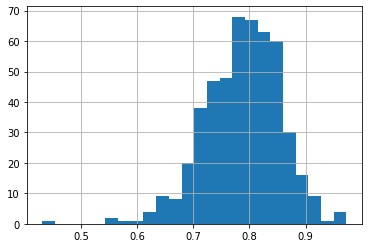

In [314]:
m20overc.FEV1OFVC.hist(bins='auto')

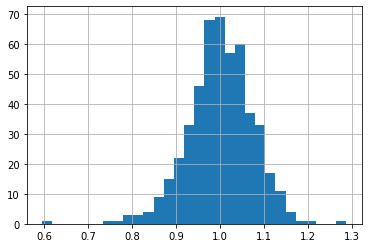

In [315]:
m20overc.FEV1OFVCPP.hist(bins='auto')

In [316]:
std = m20overc.FEV1OFVC.std()
mean = m20overc.FEV1OFVC.mean()
ratio = std / mean # m20overc.FEV1OFVC.std()/m20overc.FEV1OFVC.mean()
print (mean, ratio, ratio* 1.645, mean - (ratio*1.645))
print (.876 * mean)

0.7880228373416843 0.08683982510779856 0.14285151230232862 0.6451713250393557
0.6903080055113154


says mean FEV1/FVC .788, lower limit if use std for all data .645

The std is smaller for %predicted than for actual value
so to get 5% lower limit can use %predicted - 1.645 * std

In [317]:
std = m20overc.FEV1OFVCPP.std()
mean = m20overc.FEV1OFVCPP.mean()
ratio = std/mean # m20overc.FEV1OFVCPP.std()/m20overc.FEV1OFVCPP.mean()
print (mean, ratio, ratio*1.645, mean - (ratio*1.645))

0.9999916002560043 0.07499932419335019 0.12337388829806106 0.8766177119579432


says mean FEV1/FVC %pred is 100% and lower limit .876 of that
if use prior mean FEV1/FVC of .788, .876 of that is .69 which is higher than .645

In [318]:
print(.788*.876)

0.690288


Try saving variables to array

In [319]:
print (m20overc.name)
print (varsratio[1])
dfvar = m20overc.name + varsratio[1]
print (dfvar)

m20overc
FEV1OFEV6
m20overcFEV1OFEV6


In [320]:
print (resultsratio)

                     dfname        var  intercept     slope        r2  \
dfnvarn                                                                 
m20overbFEV1OFVC   m20overb   FEV1OFVC   0.838493 -0.000364  0.040567   
m20overbFEV1OFEV6  m20overb  FEV1OFEV6   0.848161 -0.000295  0.025118   
m20overbPEFROFVC   m20overb   PEFROFVC   2.147290 -0.000640  0.004285   
m20overbPEFROFEV6  m20overb  PEFROFEV6   2.171810 -0.000469  0.002186   
m20overbPEFROFEV1  m20overb  PEFROFEV1   2.556383  0.000309  0.000993   
...                     ...        ...        ...       ...       ...   
fallmaPEFROFVC       fallma   PEFROFVC   1.909966  0.000057  0.000008   
fallmaPEFROFEV6      fallma  PEFROFEV6   1.896003  0.001138  0.002990   
fallmaPEFROFEV1      fallma  PEFROFEV1   2.046834  0.006300  0.088368   
fallmaFEV3OFVC       fallma   FEV3OFVC   0.768530  0.011483  0.008196   
fallmaFEV6OFVC       fallma   FEV6OFVC   0.767856  0.012309  0.009432   

                        std count  
dfnvarn       

new variable %pred ratios

data.loc['m20overbFEV1OFVC']

In [321]:
def height_age_reg(data, y_var):
# convert agemonths to years
    X_age = data['HSAGEIR']/12
    X_age = np.array(X_age).reshape(-1, 1)
    X_age = np.hstack((X_age, X_age**2))
    X_height = data['BMPHT']**2
    X_height = np.array(X_height).reshape(-1, 1)
    X = np.concatenate((X_age, X_height), axis=1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
    print(data.name, ", ",y_var, ", ",lr.intercept_, ",", lr.coef_, ",", lr.score(X, y), ",",  data.loc[:,y_var].std(), ",",  data.loc[:,y_var].count())
    return data.name, y_var, lr.intercept_, lr.coef_, lr.score(X, y), data.loc[:,y_var].std(), data.loc[:,y_var].count()

In [322]:
height_age_reg(m20overb, 'SPPFEV1')

m20overb ,  SPPFEV1 ,  786.1354240600908 , [-2.89942909e+02 -1.60937192e+00  1.18534679e-01] , 0.46996609416906876 , 715.6058687439651 , 476


('m20overb',
 'SPPFEV1',
 786.1354240600908,
 array([-2.89942909e+02, -1.60937192e+00,  1.18534679e-01]),
 0.46996609416906876,
 715.6058687439651,
 476)

# Now do regression for all dataframes all nonratio variables & save resultsnonratio

# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "b1", "b2", "b3", "r2", "std", "count"]
# print (column_names)
resultsnonratio = pd.DataFrame(columns = column_names)
resultsnonratio.name = 'resultsnonratio'
print (resultsnonratio)
print ('Linear Regression of variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
print ('dataframe ,  variable,        intercept,   [b1. b2. b3]. ,            R squared,         standard deviation   count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsnonratio:
 #       print(y, " ", xx)
         reg = height_age_reg(y,xx)
         dbname, var, intercept, coef, r2, std, count = reg
         b1, b2, b3, = coef
         print (dbname, ', ', var, ', ',intercept, ', ',b1, ', ',b2, ', ',b3, ', ',r2, ', ',std, ', ',count)
         #  Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count] 

         dfnvarn = y.name + xx   
            
         df2 = {'dfnvarn': [dfnvarn], 'dfname': y.name, 'var': xx, 'intercept': intercept, 'b1': b1, 'b2': b2, 'b3': b3, 'r2':r2, 'std':std, 'count':count}                          
         resultsnonratio = resultsnonratio.append(df2, ignore_index=True)

In [323]:
# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "b1", "b2", "b3", "r2", "std", "count"]
# print (column_names)
resultsnonratio = pd.DataFrame(columns = column_names)
resultsnonratio.name = 'resultsnonratio'
print (resultsnonratio)
print ('Linear Regression of variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
print ('dataframe ,  variable,        intercept,   [b1. b2. b3]. ,            R squared,         standard deviation   count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsnonratio:
 #       print(y, " ", xx)
         reg = height_age_reg(y,xx)
         dbname, var, intercept, coef, r2, std, count = reg
         b1, b2, b3, = coef
         print (dbname, ', ', var, ', ',intercept, ', ',b1, ', ',b2, ', ',b3, ', ',r2, ', ',std, ', ',count)
         #  Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count] 

         dfnvarn = y.name + xx   
            
         df2 = {'dfnvarn': [dfnvarn], 'dfname': y.name, 'var': xx, 'intercept': intercept, 'b1': b1, 'b2': b2, 'b3': b3, 'r2':r2, 'std':std, 'count':count}                          
         resultsnonratio = resultsnonratio.append(df2, ignore_index=True)

Empty DataFrame
Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count]
Index: []
Linear Regression of variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height
dataframe ,  variable,        intercept,   [b1. b2. b3]. ,            R squared,         standard deviation   count
m20overb ,  SPPFEV1 ,  786.1354240600908 , [-2.89942909e+02 -1.60937192e+00  1.18534679e-01] , 0.46996609416906876 , 715.6058687439651 , 476
m20overb ,  SPPFEV1 ,  786.1354240600908 ,  -289.94290908497453 ,  -1.6093719150337211 ,  0.11853467887661773 ,  0.46996609416906876 ,  715.6058687439651 ,  476
m20overb ,  SPPFEV3 ,  1703.997847738743 , [ 7.22119739e+02 -1.20785187e+02  5.52237859e-02] , 0.006724697187893036 , 3962.4570009869503 , 476
m20overb ,  SPPFEV3 ,  1703.997847738743 ,  722.1197386829429 ,  -120.78518659913082 ,  0.055223785872897224 ,  0.006724697187893036 ,  3962.4570009869503 ,  476
m20overb ,  SPPFEV6 ,  1487.9798534628544 , [ 7.81210601e+02 -1.24615205e+02

def createvarspp(df):
    vn = df.name + 'FEV1OFVC'
  #  print (vn)
    resultsratio.loc[['m20overbFEV1OFVC'], ['intercept']] 
  #  print (resultsratio.loc['m20overbFEV1OFVC', 'intercept'])
  #  print (resultsratio.loc[vn, 'slope'])
    a =  resultsratio.loc['m20overbFEV1OFVC', 'intercept'] 
    b = resultsratio.loc[vn, 'slope']
  #  print (a)
  #  print ('b ', b)
    df['FEV1OFVCPP'] = df.FEV1OFVC / (a + b * (df.HSAGEIR / 12))
  #  df['FEV1OFVCPP'] = df. FEV1OFVC / (resultsratio.loc [vn,intercept] + resultsratio.loc[vn,slope]) # * df.HSAGEIR/12)
  #  df['FEV1OFVCPP'] = df.FEV1OFVC / 100
  def createvarspp(df):
    vn = df.name + 'FEV1OFVC'
  #  print (vn)
  #  resultsratio.loc[['m20overbFEV1OFVC'], ['intercept']] 
  #  print (resultsratio.loc['m20overbFEV1OFVC', 'intercept'])
  #  print (resultsratio.loc[vn, 'slope'])
  #  a =  resultsratio.loc['m20overbFEV1OFVC', 'intercept'] 
   # b = resultsratio.loc[vn, 'slope']
  #  print (a)
  #  print ('b ', b)
 #   df['FEV1OFVCPP'] = df.FEV1OFVC / (a + b * (df.HSAGEIR / 12))
    df['FEV1OFVCPP'] = df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))


In [324]:
def createvarsppone(df):
    vn = df.name + 'FEV1OFVC'
  #  print (vn)
  #  resultsratio.loc[['m20overbFEV1OFVC'], ['intercept']] 
  #  print (resultsratio.loc['m20overbFEV1OFVC', 'intercept'])
  #  print (resultsratio.loc[vn, 'slope'])
  #  a =  resultsratio.loc['m20overbFEV1OFVC', 'intercept'] 
   # b = resultsratio.loc[vn, 'slope']
  #  print (a)
  #  print ('b ', b)
 #   df['FEV1OFVCPP'] = df.FEV1OFVC / (a + b * (df.HSAGEIR / 12))
    df['FEV1OFVCPP'] = df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    print (vn)

def createvarspp(df):
    vn = df.name + 'FEV1OFVC'
    df['FEV1OFVCPP'] = df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
 #   print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6PP']= df.FEV1OFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFEV6'
    df['PEFROFEV6PP']= df.PEFROFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFEV1'
    df['PEFROFEV1PP'] = df.PEFROFEV1 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV3OFVC'
    df['FEV3OFVCPP'] = df.FEV3OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV6OFVC'
    df['FEV6OFVCPP'] = df.FEV6OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))

In [325]:
def createvarspp(df):
    vn = df.name + 'FEV1OFVC'
    df['FEV1OFVCPP'] = df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
 #   print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6PP']= df.FEV1OFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFEV6'
    df['PEFROFEV6PP']= df.PEFROFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFEV1'
    df['PEFROFEV1PP'] = df.PEFROFEV1 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV3OFVC'
    df['FEV3OFVCPP'] = df.FEV3OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV6OFVC'
    df['FEV6OFVCPP'] = df.FEV6OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))

In [ ]:
m20overb.describe()

In [ ]:
plt.scatter(X, y)

In [ ]:
from scipy import stats

# now plot y actual value (e.g. of PEFR/FVC) vs predicted PEFR/FVC
first need new value PEFROFVCPRED = the regression for predicted
  and PEFROFVCPP - %predicted of PEF
then do linear regression of x = PEFROFVCPRED and y = PEFROFVCROFVC
do scatter plot of X,y to see if 
do histogram of PEFROFVC
do linear regression and scatter plot of PEFROFVCPP (y) versus age to see if the SDev varies by age
need see if normal distribution of 

Also have new variables PEFRPP/FVCPP - or PEFRPP-FVCPP
  then see if one or other has normal distribution and what is variance
  ratio should be centered around 1; and difference around 0
  I have been using PEFRPP-FVCPP >30 as indicator, but ratio may be better (e.g. if more than 1.3,

do plot of actual FEV1 vs predicted FEV1 ( x vs y)
to get lower limit, need standard deviation - first see if normal distribution
  then fit to gaussian and sdev from that
  
  need check whether same sdev for each age; whether same for each height, for each height**2, for each predicted FEV1
    by categories


We're trying to replicate and update Hankinson

We're trying to replicate and update Hankinson

# Now need determine LLN - ?used std

Determine lower limit of normal
  can do this if get starndard deviation for each variable
Assuming normal distribution get standard deviation for each variable
Could create variable as %predicted, then do normal distribution of the %predicteds
Would want to check if the standard deviation varied by age ?height
Alternatively is there a way to get lower 5%
